<img align="right" style="padding-left:50px;" src="figures_wk4/data_cleaning.png" width=350><br>
### User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

Dataset:
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

In [49]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [50]:
df= pd.read_csv('survey_data.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


In [52]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


In [53]:
# Numbe of people who answered the survey
num_people = df.shape[0]
num_people

28108

In [54]:
# Looking at Null values in the data (percentage)
df.isnull().sum()/num_people*100

timestamp     0.000000
q1            0.000000
q2            0.266828
q3            0.003558
q4           74.124804
q5            0.000000
q6           26.024619
q7            0.000000
q8           99.249324
q9           89.159670
q10           0.000000
q11          17.909492
q12           0.291732
q13           0.000000
q14           0.000000
q15           0.793368
q16           0.608368
q17           0.629714
dtype: float64

- q4 (Additional Job Title Context): Optional free-text field, many respondents skip it.
- q6 (Additional Compensation): Many respondents don't receive bonuses/overtime, so missing values likely mean zero.
- q8 (Other Currency): Only relevant when q7 = "Other"; otherwise, left blank.
- q9 (Additional Income Context) → Optional free-text field, many respondents don’t provide extra details.
- q11 (State - U.S. only): Missing when not from the U.S., or respondent didn't specify their state.
- q2 (Industry), q12 (City), q15 (Education), q16 (Gender), q17 (Race): Minor omissions due to non-responses.
- q3 (Job Title): Very few missing; likely an entry error or skipped question.

In [55]:
# By Looking at the survey questions. converting columns to categorical data
#1, 2, 7, 11, 13, 14, 15, 16, 17

categorical_columns = ['q1', 'q2', 'q7', 'q11', 'q13', 'q14', 'q15', 'q16', 'q17']

# Converting columns to categorical data
df[categorical_columns] = df[categorical_columns].astype('category')


In [56]:
df.q12.unique()

array(['Boston', 'Cambridge', 'Chattanooga', ..., 'Rabat',
       'Tifton, Valdosta, Jacksonville', 'Dar es Salaam'],
      shape=(4842,), dtype=object)

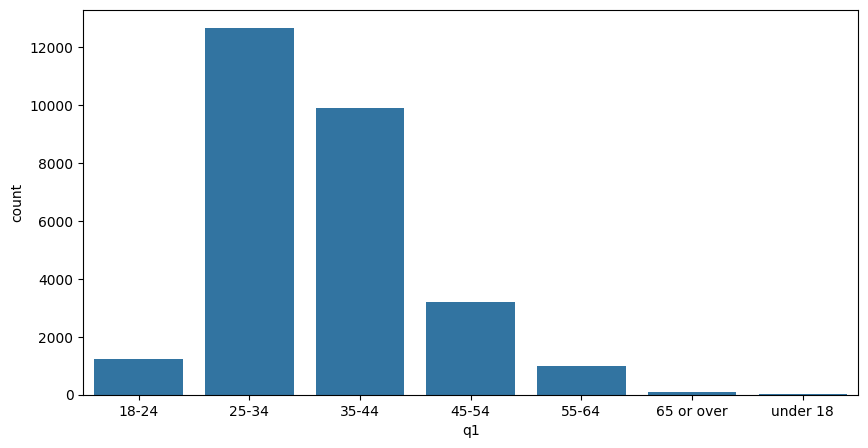

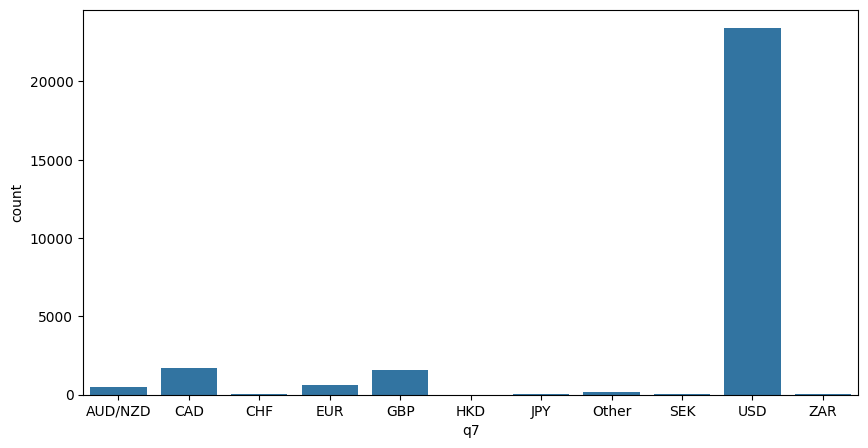

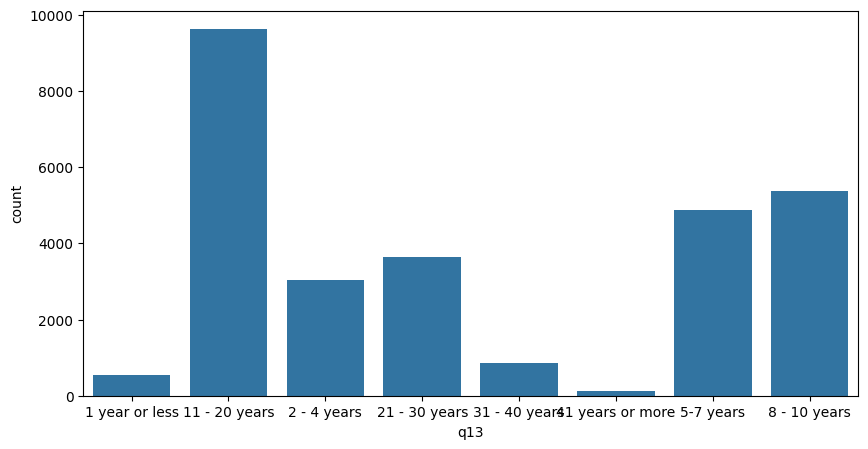

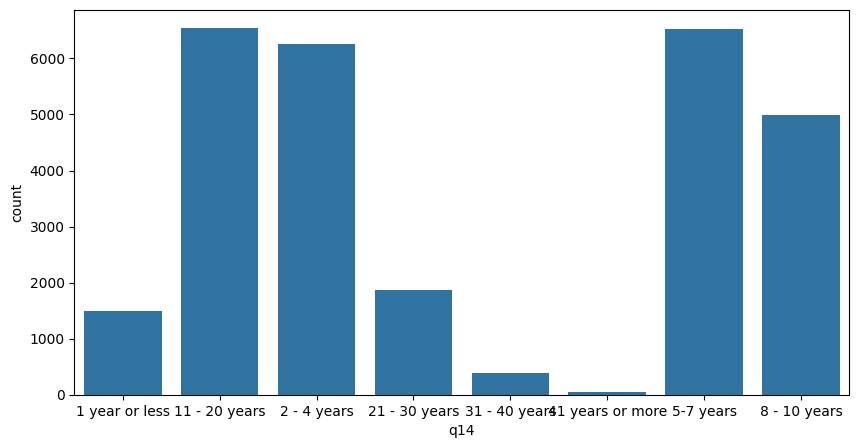

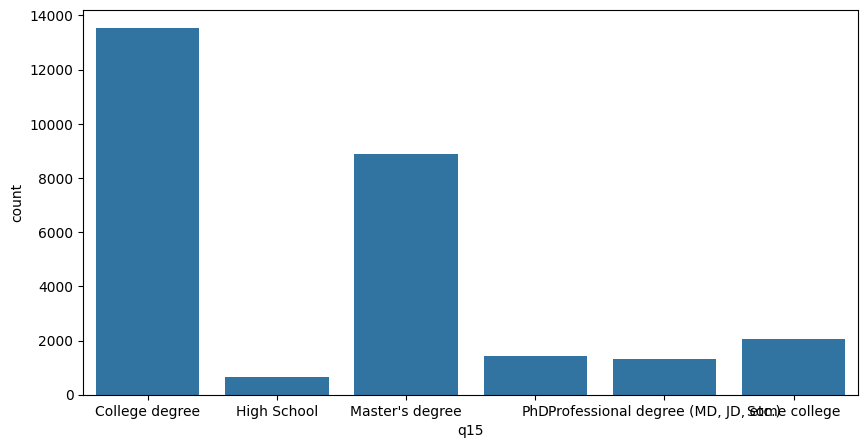

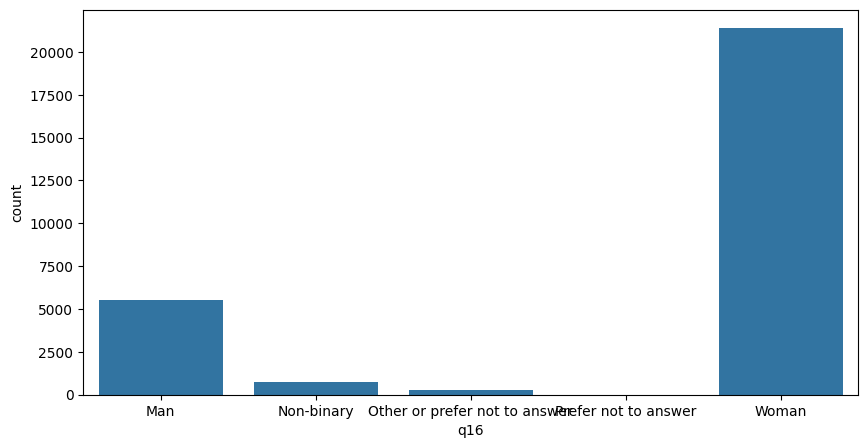

In [57]:
# Plotting the barchart for all the categorical columns for better understanding of the data
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['q1', 'q7', 'q13', 'q14', 'q15', 'q16']:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col)
    plt.show()


In [58]:
for col in ['q2', 'q11', 'q17', 'q10']:
    print(f'{col} : {df[col].nunique()}')

q2 : 1220
q11 : 137
q17 : 51
q10 : 382


In [59]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

0
0


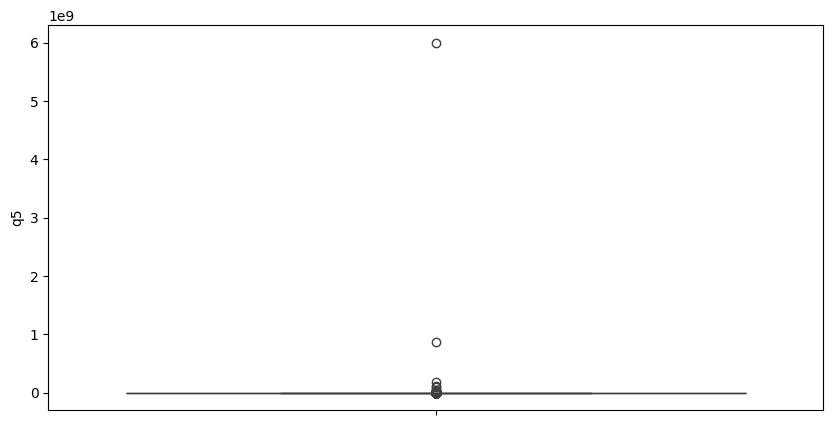

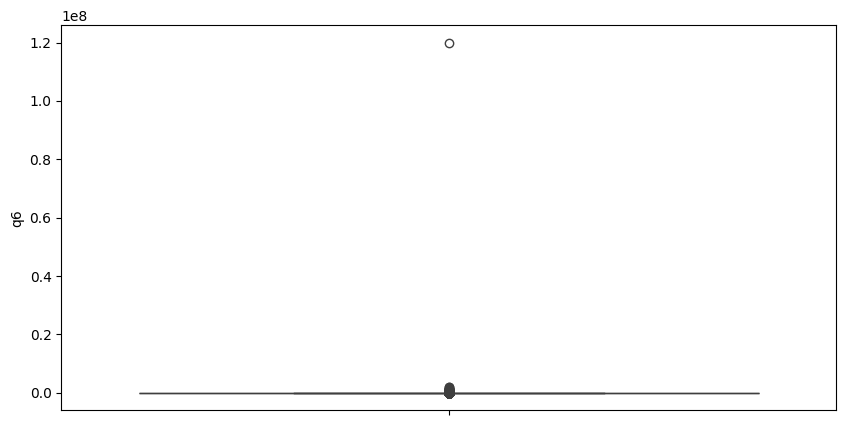

In [60]:
# Looking at the distribution of numerical columns
# Convert q5 and q6 to numerical columns
print(df.q5.isna().sum())

df.q5 = df.q5.apply(clean_currency).astype('float')
df.q6 = df.q6.apply(clean_currency).astype('float')

df['q5'] = pd.to_numeric(df['q5'])
df['q6'] = pd.to_numeric(df['q6'])

print(df.q5.isna().sum())

# box plot for numerical columns (q5, q6)
for col in ['q5', 'q6']:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, y=col)
    plt.show()

`Question: How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).`

State of the Dataset

The dataset contains 28,108 survey responses, covering salary, demographic, and professional details. While it is well-structured, it has notable missing data in certain fields. The Job Title Clarification (q4) field is missing in 74.12% of responses, likely because it was optional. Similarly, Additional Compensation (q6) is missing for 26.02% of respondents, possibly because they do not receive bonuses or overtime. The Income Context (q9) field has 89.15% missing values, suggesting it is relevant only for specific cases. In the location-based fields, U.S. State (q11) is missing for 17.91%, likely due to non-U.S. respondents, while City (q12) is nearly complete with only 0.29% missing.

The dataset shows skewed distributions in several key demographic fields. The age distribution (q1) is concentrated in the 25-34 and 35-44 age groups, with fewer respondents in older brackets. The currency distribution (q7) is overwhelmingly dominated by USD, while other currencies such as GBP, CAD, and EUR are present in smaller amounts. Work experience data (q13, q14) shows that most respondents have 5-7, 8-10, or 11-20 years of experience, while relatively fewer have less than a year or over 30 years. Education levels (q15) indicate that most respondents hold a college degree or master’s degree, with fewer reporting a Ph.D. or professional degrees. Gender data (q16) is imbalanced, with the majority identifying as women, fewer identifying as men, and an even smaller number as non-binary or other categories.`

There is high variability in some categorical fields, which may require standardization. The Industry (q2) field has 1,220 unique values, suggesting inconsistencies or excessive granularity that could be grouped into broader categories. The State (q11) field has 137 unique values, which may include duplicate representations or inconsistent formatting. The Race (q17) field has 51 unique values, indicating potential inconsistencies in response formats. These fields would benefit from categorical grouping to enable better aggregation and analysis.

A major issue is the presence of extreme outliers in salary and additional compensation data (q5, q6). The box plots indicate values in the billions, which are likely errors or unrealistic responses. Cleaning these fields by removing extreme values and converting salary fields into numeric format will improve the reliability of salary-based analysis.

#### The Plan

`Now, it is time to plan how you will clean up the dataset. You are not allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)`

`Question: Based on your EDA above, detail how you would clean up this dataset. ` <br>
`Things to consider: (This is not an exhaustive list)` <br>
` - Are there columns that can't be effectively cleaned? If so, why?` <br>
` - Are there columns that genuinely won't have a data value?` <br>
` - Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?` <br>
` - Are outliers a factor in this dataset?` <br>

`Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.`

**Data Cleaning Plan**

This plan ensures that the dataset is structured, consistent, and prepared for analysis while minimizing data loss. Missing values, inconsistencies, formatting issues, and outliers will be addressed systematically to improve data integrity.

**Handling Columns That Cannot Be Effectively Cleaned**
Certain columns contain excessive missing values or lack a structured format, making them unsuitable for meaningful analysis. The Job Title Clarification column will be dropped due to 74% missing values, making it unreliable. The Other Currency column will also be dropped as it contains 99% missing values, leaving insufficient data for useful insights. Similarly, the Income Context column, which consists of free-text responses, will be removed due to a high percentage of missing values and the lack of a standard structure.

**Managing Columns with Expected Missing Values**  
Some columns naturally contain missing values due to the structure of the survey. The State column will remain missing when the country is not the United States, as it is not applicable. The City column will also be left as missing where respondents have not provided the data. For Additional Compensation, missing values will be assumed to represent no additional compensation and will be filled with 0.

**Segmented Handling of Missing Values**
To maintain consistency and accuracy, missing values will be handled based on segmentation. The Country column will be standardized to ISO 3166-1 Alpha-2 codes to ensure uniformity. The Industry column will be grouped, and responses that do not fit into predefined categories will be categorized as "Other". The Education Level column will be converted into an ordinal scale, and missing values will be replaced with the mode. For Gender and Race, categories will be standardized, and missing values will be filled with "Unknown" to avoid incorrect assumptions or bias.

**Outlier Handling** 
Salary-related data will be adjusted for consistency. Annual Salary and Additional Compensation will be converted to numeric values, ensuring that formatting issues are resolved. Since different currencies exist in the dataset, salaries will be adjusted to USD using the Currency column before it is removed. Outliers in salary data will be capped using the Interquartile Range (IQR) method to prevent extreme values from distorting the dataset.

**Final Transformations**
To ensure consistency across categorical variables, If it does not provide useful insights, it will be removed. The Age Group column will be converted into categorical values using label encoding for easier analysis. Additionally, Total Experience and Field Experience will be transformed into ordinal values, making them more structured for comparisons and modeling.

**Final Actions**  
- Columns with excessive missing values will be removed to improve data quality.  
- Categorical variables will be standardized to ensure consistency in analysis.  
- Missing values will be handled based on segmentation, considering logical replacements.  
- Salary and compensation data will be converted to a unified currency, and extreme values will be capped to avoid distortions.  
- Data will be structured for further analysis, ensuring that it remains useful for insights and potential machine learning applications.  

This structured cleaning approach preserves valuable information while improving dataset quality, making it more suitable for analysis and decision-making.

#### Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

In [61]:
industry_list = [
    "Accounting, Banking & Finance",
    "Agriculture or Forestry",
    "Art & Design",
    "Business or Consulting",
    "Computing or Tech",
    "Education (Primary/Secondary)",
    "Education (Higher Education)",
    "Engineering or Manufacturing",
    "Entertainment",
    "Government and Public Administration",
    "Health care",
    "Hospitality & Events",
    "Insurance",
    "Law",
    "Law Enforcement & Security",
    "Leisure, Sport & Tourism",
    "Marketing, Advertising & PR",
    "Media & Digital",
    "Nonprofits",
    "Property or Construction",
    "Retail",
    "Sales",
    "Social Work",
    "Transport or Logistics",
    "Utilities & Telecommunications"
]

Others = []


In [62]:
def get_industry(industry):
    # return industry if it is in the list else return 'Others'
    if industry in industry_list:
        return industry
    else:
        if industry not in Others:
            Others.append(industry)
        return 'Others'

In [63]:
df['q2'] = df['q2'].map(get_industry)
df.q2.value_counts()

q2
Computing or Tech                       4711
Others                                  2709
Education (Higher Education)            2466
Nonprofits                              2420
Health care                             1899
Government and Public Administration    1893
Accounting, Banking & Finance           1812
Engineering or Manufacturing            1700
Marketing, Advertising & PR             1136
Law                                     1097
Business or Consulting                   853
Education (Primary/Secondary)            838
Media & Digital                          774
Insurance                                532
Retail                                   505
Property or Construction                 387
Art & Design                             359
Utilities & Telecommunications           357
Transport or Logistics                   304
Sales                                    286
Social Work                              274
Hospitality & Events                     262
Enterta

In [64]:
# Handling curency conversion. Converting all the currency to USD

import numpy as np

list_of_other_currency = [currency for currency in df.q7.unique() if currency != 'USD']
exchange_rates = {
    'GBP': 0.806270,
    'CAD': 1.429279,
    'EUR': 0.968215,
    'AUD': 1.594758,
    'NZD': 1.766587,
    'CHF': 0.909808,
    'ZAR': 18.414176,
    'SEK': 10.942021,
    'HKD': 7.790902,
    'JPY': 151.417286,
    'AUD/NZD': np.mean([1.594758, 1.766587]),
}

In [65]:
# Convert (q5 & q6) to USD if q7 is not USD
def convert_currency(row, col):
    if row['q7'] != 'USD' and row['q7'] in list_of_other_currency and row['q7'] in exchange_rates:
        return row[col] * exchange_rates[row['q7']]
    elif row['q7'] == 'USD':
        return row[col]
    else:
        print(row[col])
        print('Unknown currency')

# Dropping 'other' currency categories
df = df[df.q7 != 'Other']
# Dropping null values in q5
df = df.dropna(subset=['q5'])

df['q5'] = df.apply(lambda row: convert_currency(row, 'q5'), axis=1)
df['q6'] = df.apply(lambda row: convert_currency(row, 'q6'), axis=1)

# replace null with 0 for q6
df.q6.fillna(0, inplace=True)

# drop q7
df.drop(columns=['q7', 'q8', 'q9', 'q4'], inplace=True)

df.sample(10)

,timestamp,q1,q2,q3,q5,q6,q10,q11,q12,q13,q14,q15,q16,q17
9064,4/27/2021 17:09:05,65 or over,Computing or Tech,Operations Data Analyst,120000.00000,0.0,US,Washington,Seattle,31 - 40 years,8 - 10 years,College degree,Woman,White
7034,4/27/2021 14:22:30,45-54,Computing or Tech,Platform Engineer,64501.60000,0.0,England,NaN,Bristol,21 - 30 years,21 - 30 years,High School,Man,White
24931,5/5/2021 22:33:49,18-24,"Marketing, Advertising & PR",Platform Executive,75630.26250,0.0,Australia,NaN,Brisbane,2 - 4 years,1 year or less,College degree,Woman,White
18518,4/29/2021 0:37:28,25-34,"Marketing, Advertising & PR",Senior Product Marketing Manager,210000.00000,35000.0,United States,California,San Francisco,8 - 10 years,2 - 4 years,Master's degree,Man,Asian or Asian American
27622,1/21/2022 21:17:55,35-44,Health care,Clinical Social Worker LCSW,78000.00000,0.0,United States,North Carolina,Raleigh Durham area,11 - 20 years,11 - 20 years,Master's degree,Woman,White
2622,4/27/2021 11:48:33,35-44,Insurance,Data Governance,130000.00000,20000.0,United States,Kentucky,Louisville,11 - 20 years,2 - 4 years,"Professional degree (MD, JD, etc.)",Woman,White
22646,4/30/2021 21:57:58,35-44,Health care,Optician,60000.00000,5000.0,US,New York,Poughkeepsie,21 - 30 years,21 - 30 years,High School,Woman,White
21148,4/29/2021 22:08:30,45-54,Education (Higher Education),University Librarian,140000.00000,0.0,USA,Virginia,Lexington,11 - 20 years,11 - 20 years,PhD,Woman,White
10482,4/27/2021 21:05:53,45-54,Computing or Tech,Executive business administrator,90000.00000,20000.0,USA,Washington,Redmond,11 - 20 years,11 - 20 years,High School,Woman,White
4114,4/27/2021 12:25:20,25-34,Government and Public Administration,Work Coach,22224.83255,0.0,UK,NaN,Remote,8 - 10 years,1 year or less,College degree,Woman,White


In [ ]:
! pip install country_converter

In [66]:
# Converting country column to ISO format
import country_converter as coco
import regex as re

cc = coco.CountryConverter()
def convert_to_iso3(country_name):

    # remove all the special characters using regex
    country_name = re.sub(r'[^\w\s><]', '', country_name)
    # convert to lower case
    country_name = country_name.lower().replace(' ', '')
    result = cc.convert(names=country_name,to='name_short')
    if isinstance(result, list):
        return 'Multiple Countries'
    else:
        return result

df['q10'] = df['q10'].apply(convert_to_iso3)



scotland not found in regex
scotland not found in regex
scotland not found in regex
us> not found in ISO3
isa not found in ISO3
unitedstate not found in regex
america not found in regex
scotland not found in regex
unitedstateofamerica not found in regex
unitedstate not found in regex
unitedstated not found in regex
northernireland not found in regex
unitedstated not found in regex
contracts not found in regex
scotland not found in regex
unitedstatws not found in regex
unitedstated not found in regex
america not found in regex
scotland not found in regex
scotland not found in regex
wedontgetraiseswegetquarterlybonusesbuttheyperiodicallyassesincomeintheareayouworksoigotaraisebecausea3rdpartyassessmentshowediwaspaidtoolittlefortheareawewerelocated not found in regex
unitesstates not found in regex
unitedsates not found in regex
scotland not found in regex
global not found in regex
uniitedstates not found in regex
worldwidebasedinusbutshorttermtripsaroudntheworld not found in regex
uniteds

In [67]:
df['q10'].value_counts()

q10
United States             23062
Canada                     1683
United Kingdom             1531
Australia                   385
not found                   237
                          ...  
Namibia                       1
Bosnia and Herzegovina        1
Liechtenstein                 1
Saudi Arabia                  1
South Sudan                   1
Name: count, Length: 94, dtype: int64

In [68]:
# Adding 'Unknown' category to q15, q16, q17
df.q15 = df.q15.cat.add_categories('Unknown')
df.q16 = df.q16.cat.add_categories('Unknown')
df.q17 = df.q17.cat.add_categories('Unknown')
df.q11 = df.q11.cat.add_categories('Unknown')

# Replacing null values with 'Unknown' for q15, q16, q17
df.q15.fillna('Unknown', inplace=True)
df.q16.fillna('Unknown', inplace=True)
df.q17.fillna('Unknown', inplace=True)

df.q11.fillna('Unknown', inplace=True)
df.q12.fillna('Unknown', inplace=True)

# Dropping null values in q3
df = df.dropna(subset=['q3'])

In [69]:
df.sample(10)

,timestamp,q1,q2,q3,q5,q6,q10,q11,q12,q13,q14,q15,q16,q17
13012,4/28/2021 12:01:50,35-44,Others,Project Manager,118000.00000,15000.0,United States,California,Los Angeles,21 - 30 years,21 - 30 years,College degree,Woman,White
4192,4/27/2021 12:27:29,35-44,Education (Higher Education),Officer,80039.62400,0.0,Canada,Unknown,Montreal,2 - 4 years,8 - 10 years,PhD,Non-binary,White
27108,10/26/2021 12:32:26,45-54,Computing or Tech,Senior Technical Program Manager,255000.00000,290000.0,United States,California,Sunnyvale,31 - 40 years,21 - 30 years,College degree,Man,White
22919,5/1/2021 7:59:09,45-54,Education (Higher Education),Associate professor,40313.50000,0.0,United Kingdom,Unknown,London,21 - 30 years,11 - 20 years,PhD,Woman,White
2630,4/27/2021 11:48:43,35-44,Government and Public Administration,Assistant Statistician,26748.81352,0.0,United Kingdom,Unknown,Newcastle upon Tyne,11 - 20 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...
12264,4/28/2021 9:10:40,35-44,Others,Project Lead,98000.00000,10000.0,United States,Indiana,Indianapolis,11 - 20 years,2 - 4 years,Master's degree,Woman,White
26319,5/24/2021 5:12:24,18-24,Government and Public Administration,Junior Analyst,97479.00500,0.0,New Zealand,Unknown,Wellington,2 - 4 years,1 year or less,College degree,Woman,White
489,4/27/2021 11:10:40,45-54,Engineering or Manufacturing,Executive Assistant,65000.00000,7000.0,United States,Unknown,Ann Arbor area,11 - 20 years,11 - 20 years,College degree,Woman,White
5171,4/27/2021 13:00:16,45-54,Computing or Tech,Sr. Principal Curriculum Developer,132000.00000,7500.0,United States,New Mexico,Rio Rancho,21 - 30 years,21 - 30 years,College degree,Woman,White
25245,5/6/2021 10:47:02,35-44,Others,Senior scientist,122000.00000,14000.0,United States,Wisconsin,Madison,11 - 20 years,11 - 20 years,PhD,Woman,White


In [70]:

experience_mapping = {
    "1 year or less": 0,
    "2 - 4 years": 1,
    "5-7 years": 2,
    "8 - 10 years": 3,
    "11 - 20 years": 4,
    "21 - 30 years": 5,
    "31 - 40 years": 6,
    "41 years or more": 7
}

age_mapping = {
    "under 18": 0,
    "18-24": 1,
    "25-34": 2,
    "35-44": 3,
    "45-54": 4,
    "55-64": 5,
    "65 or over": 6
}

df['q1'] = df['q1'].map(age_mapping)
df['q13'] = df['q13'].map(experience_mapping)
df['q14'] = df['q14'].map(experience_mapping)

df.sample(10)

,timestamp,q1,q2,q3,q5,q6,q10,q11,q12,q13,q14,q15,q16,q17
22574,4/30/2021 21:14:49,4,Engineering or Manufacturing,Program manager,130000.000,5000.0,United States,Illinois,Chicago,5,2,Master's degree,Man,White
17796,4/28/2021 21:28:24,3,Engineering or Manufacturing,Senior Engineer,110000.000,13000.0,United States,Pennsylvania,Philadelphia,4,4,Master's degree,Woman,Asian or Asian American
12342,4/28/2021 9:30:12,2,"Accounting, Banking & Finance",Cost Analyst,89000.000,500.0,United States,Alabama,Huntsville,1,1,College degree,Man,White
19009,4/29/2021 6:44:12,3,Government and Public Administration,Program analyst,131000.000,1000.0,United States,District of Columbia,Washington DC,4,4,Master's degree,Woman,White
6738,4/27/2021 14:05:04,4,Insurance,"Assoc Director, Corporate Insurance",135000.000,30000.0,United States,Texas,Dallas,5,5,College degree,Woman,White
9809,4/27/2021 18:58:13,2,Engineering or Manufacturing,Customer Service Representative,31200.000,0.0,United States,Missouri,St. Louis,1,0,Some college,Woman,White
706,4/27/2021 11:13:52,4,Health care,Senior Director,176500.000,0.0,United States,Pennsylvania,Philadelphia,5,4,PhD,Woman,White
1008,4/27/2021 11:18:32,4,Education (Higher Education),admissions communications,50000.000,0.0,United States,Georgia,atlanta,5,1,College degree,Woman,White
23117,5/1/2021 15:08:13,2,Government and Public Administration,Casework Assistant,14915.995,0.0,United Kingdom,Unknown,"Leeds, UK",2,0,Master's degree,Woman,White
12426,4/28/2021 9:48:14,2,Government and Public Administration,Hydrologic Technician,40251.000,0.0,United States,Illinois,Urbana,2,2,College degree,Woman,White


In [71]:
# Renaming the columns for better understanding
df.rename(columns={
    'q1': 'Age',
    'q2': 'Industry',
    'q3': 'Role',
    'q5': 'Salary',
    'q6': 'Bonus',
    'q10': 'Country',
    'q11': 'State',
    'q12': 'City',
    'q13': 'Years of Experience',
    'q14': 'Years in Current Role',
    'q15': 'Education',
    'q16': 'Gender',
    'q17': 'Race',
}, inplace=True)

df.sample(10)

,timestamp,Age,Industry,Role,Salary,Bonus,Country,State,City,Years of Experience,Years in Current Role,Education,Gender,Race
16110,4/28/2021 17:32:22,2,"Marketing, Advertising & PR",Account Director,85000.0000,5000.000,United States,Utah,Salt Lake City,2,2,College degree,Man,White
27173,10/26/2021 13:02:13,3,Computing or Tech,Solution Architect,135000.0000,0.000,United States,Texas,Dallas,4,4,Master's degree,Man,White
24405,5/5/2021 15:15:38,2,Others,Talent Acquisition Coordinator,50000.0000,2000.000,United States,Illinois,Chicago,3,0,College degree,Woman,"Asian or Asian American, White"
16259,4/28/2021 17:42:02,3,Retail,Store Manager,69500.0000,0.000,United States,Arizona,Chandler,5,4,College degree,Man,White
3123,4/27/2021 11:59:22,2,Education (Primary/Secondary),Library Manager,72000.0000,0.000,United States,Minnesota,St Paul,3,3,Master's degree,Woman,White
18839,4/29/2021 3:42:56,2,"Marketing, Advertising & PR",Senior Communications Specialist,78000.0000,0.000,United States,Washington,Seattle,2,2,Master's degree,Woman,White
5625,4/27/2021 13:17:42,2,"Marketing, Advertising & PR",digital strategist,62500.0000,10500.000,United States,District of Columbia,Washington,2,1,Some college,Woman,Asian or Asian American
18837,4/29/2021 3:40:09,3,Law,Senior Associate,327731.1375,0.000,New Zealand,Unknown,Auckland,4,4,"Professional degree (MD, JD, etc.)",Woman,White
7608,4/27/2021 15:00:27,2,Law,Associate General Counsel,170000.0000,10000.000,United States,Wisconsin,Telecommute from small town,2,1,"Professional degree (MD, JD, etc.)",Woman,Asian or Asian American
18920,4/29/2021 5:07:23,3,Computing or Tech,Principal Solutions Architect,141903.5200,3386.334,United Kingdom,Unknown,London,5,5,College degree,Man,White


In [72]:
# Removing the outliers from Salary and Bonus columns using IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Salary'] >= (Q1 - 1.5 * IQR)) & (df['Salary'] <= (Q3 + 1.5 * IQR))]
        
Q1 = df['Bonus'].quantile(0.25)
Q3 = df['Bonus'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Bonus'] >= (Q1 - 1.5 * IQR)) & (df['Bonus'] <= (Q3 + 1.5 * IQR))]

df.shape


(23369, 14)

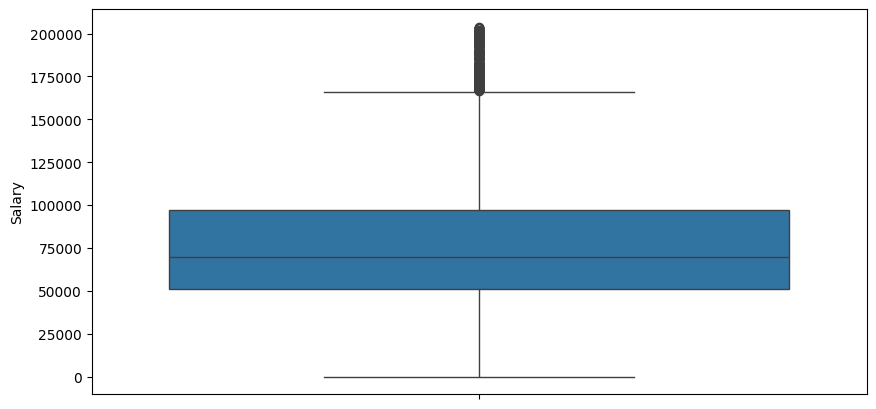

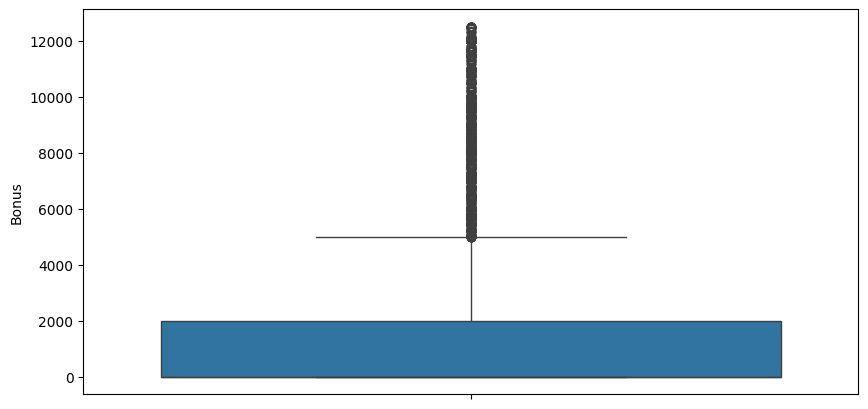

In [73]:
# Box plot for Salary and Bonus columns
for col in ['Salary', 'Bonus']:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, y=col)
    plt.show()

#### Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

[Add you answer to this markdown cell]

### Reflection on Dataset Cleaning  

Cleaning this dataset came with several challenges, the biggest being missing values, inconsistencies, and extreme outliers. Some columns, like Job Title Clarification (q4) and Income Context (q9), had a large percentage of missing values (74% and 89%, respectively), making them difficult to use effectively. The Currency column (q7) introduced another challenge, as salaries were reported in multiple currencies and needed to be standardized to USD. The Country column (q10) contained 382 unique values, which suggested inconsistencies caused by typos, alternative spellings, or different naming conventions. The Salary (q5) and Additional Compensation (q6) columns also had extreme outliers, with some values reaching billions, which would have severely skewed any machine learning model if left unhandled.

Cleaning the dataset made it far more structured and usable for machine learning. Categorical variables were standardized and encoded, while numerical values were formatted and normalized. Age groups (q1) were converted into numeric labels, and experience (q13, q14) and education levels (q15) were transformed into ordinal scales. Geographic inconsistencies were addressed by merging state (q11) and city (q12) into a single location field. Missing values in compensation (q6) were replaced with zero, ensuring that the model interprets them correctly rather than treating them as unknown values. These transformations helped in making the dataset more consistent, complete, and reliable for analysis.

If a model had been trained on the uncleaned dataset, it would have struggled with accuracy and generalizability. Inconsistent salary values, caused by multiple currencies, would have led to incorrect comparisons—for example, a salary in Indian Rupees could have been misinterpreted as a low salary compared to USD, affecting predictions significantly. Unrealistic outliers in compensation could have led to overfitting, making the model unreliable in real-world applications. Missing values in key categorical fields, like industry or job title, could have introduced bias or caused models to drop valuable data. On the other hand, a cleaned dataset ensures that all inputs are properly formatted, reducing errors and improving prediction accuracy.

While cleaning, every effort was made to minimize bias, but some trade-offs had to be made. For instance, rare industries were grouped under an “Other” category, which may have led to some loss of detail but was necessary to avoid overfitting. Similarly, missing gender (q16) and race (q17) values were replaced with “Unknown”, preserving completeness without making assumptions. However, free-text responses like Job Title Clarification (q4) and Income Context (q9) had to be removed, as they were too unstructured for immediate use. Despite these choices, the goal remained to retain as much data as possible while making it machine-learning-ready, ensuring that the final dataset was clean, structured, and unbiased for predictive modeling.

In [74]:
# Saving the cleaned data to a new csv file
df.to_csv('cleaned_survey_data.csv', index=False)